<a href="https://www.kaggle.com/code/umangtri/diabetic-retinopathy-version-2?scriptVersionId=106443787" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eyepacspreprocess/trainLabels.csv
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/81_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/17169_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/38111_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/23964_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/13170_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/23309_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/18069_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/40447_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/29064_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/12589_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/39457_left.jpeg
/kag

## Importing libraries and modules

In [2]:
# Necessary utility modules and libraries
import os
import shutil
import pathlib
import random
import datetime
import cv2

# Plotting libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

# Libraries for building the model
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout, Activation, GlobalAveragePooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3, Xception, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend
from tensorflow.keras.regularizers import l2, l1
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score

## Data Loading and Pre-processing

In [3]:
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [4]:
dir_path = '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess'
os.listdir(dir_path)

['81_right.jpeg',
 '17169_left.jpeg',
 '38111_right.jpeg',
 '23964_left.jpeg',
 '13170_left.jpeg',
 '23309_left.jpeg',
 '18069_right.jpeg',
 '40447_right.jpeg',
 '29064_right.jpeg',
 '12589_left.jpeg',
 '39457_left.jpeg',
 '17441_left.jpeg',
 '36055_right.jpeg',
 '31624_right.jpeg',
 '43894_right.jpeg',
 '21649_right.jpeg',
 '21026_right.jpeg',
 '20412_right.jpeg',
 '3473_right.jpeg',
 '36596_right.jpeg',
 '32592_right.jpeg',
 '20529_left.jpeg',
 '38477_left.jpeg',
 '25458_right.jpeg',
 '33797_right.jpeg',
 '14883_left.jpeg',
 '14386_left.jpeg',
 '19447_left.jpeg',
 '21110_right.jpeg',
 '16515_right.jpeg',
 '9016_right.jpeg',
 '20196_right.jpeg',
 '24163_left.jpeg',
 '4930_right.jpeg',
 '34299_left.jpeg',
 '22679_right.jpeg',
 '24867_right.jpeg',
 '1452_right.jpeg',
 '12968_right.jpeg',
 '24593_left.jpeg',
 '39140_left.jpeg',
 '30407_right.jpeg',
 '3072_left.jpeg',
 '31891_left.jpeg',
 '32130_right.jpeg',
 '31763_left.jpeg',
 '8769_right.jpeg',
 '19878_right.jpeg',
 '15879_left.jpeg',


In [5]:
df_temp = pd.read_csv("../input/eyepacspreprocess/trainLabels.csv")

In [6]:
len(df_temp), df_temp

(35108,
              image  level
 0          10_left      0
 1         10_right      0
 2          13_left      0
 3         13_right      0
 4          15_left      1
 ...            ...    ...
 35103  44347_right      0
 35104   44348_left      0
 35105  44348_right      0
 35106   44349_left      0
 35107  44349_right      1
 
 [35108 rows x 2 columns])

In [7]:
df_temp['level'].value_counts()

0    25802
2     5288
1     2438
3      872
4      708
Name: level, dtype: int64

In [8]:
class_code = {0: "No_DR",
              1: "Mild", 
              2: "Moderate",
              3: "Severe",
              4: "Proliferate_DR"}
df_temp.rename(columns={"image": "id_code", "level": "diagnosis"}, inplace=True)

In [9]:
def mapping_temp(df, root=dir_path):
    class_code = {0: "No_DR",
                  1: "Mild", 
                  2: "Moderate",
                  3: "Severe",
                  4: "Proliferate_DR"}
    df['label'] = list(map(class_code.get, df['diagnosis']))
    df['path'] = [i[1]['label']+'/'+i[1]['id_code']+'.jpeg' for i in df.iterrows()]
    return df

mapping_temp(df_temp)

id_code  diagnosis  label                    path
0          10_left          0  No_DR      No_DR/10_left.jpeg
1         10_right          0  No_DR     No_DR/10_right.jpeg
2          13_left          0  No_DR      No_DR/13_left.jpeg
3         13_right          0  No_DR     No_DR/13_right.jpeg
4          15_left          1   Mild       Mild/15_left.jpeg
...            ...        ...    ...                     ...
35103  44347_right          0  No_DR  No_DR/44347_right.jpeg
35104   44348_left          0  No_DR   No_DR/44348_left.jpeg
35105  44348_right          0  No_DR  No_DR/44348_right.jpeg
35106   44349_left          0  No_DR   No_DR/44349_left.jpeg
35107  44349_right          1   Mild   Mild/44349_right.jpeg

[35108 rows x 4 columns]

In [10]:
# weiner filter
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = np.fft.fft2(dummy)
    kernel = np.fft.fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(np.fft.ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

In [11]:
def image_preprocessing(img):
    # 1. Read the image
#     img = mpimg.imread(img_path)
    img = img.astype(np.uint8)
    
    # 2. Extract the green channel of the image
    b, g, r = cv2.split(img)
    
    # 3.1. Apply CLAHE to intensify the green channel extracted image
    clh = cv2.createCLAHE(clipLimit=4.0)
    g = clh.apply(g)
    
    # 3.2. Convert enhanced image to grayscale
    merged_bgr_green_fused = cv2.merge((b, g, r))
    img_bw = cv2.cvtColor(merged_bgr_green_fused, cv2.COLOR_BGR2GRAY)
    
    # 4. Remove the isolated pixels using morphological cleaning operation.
    kernel1 = np.ones((1, 1), np.uint8)
    morph_open = cv2.morphologyEx(img_bw, cv2.MORPH_OPEN, kernel1)
    
    # 5. Extract blood vessels using mean-C thresholding.
    thresh = cv2.adaptiveThreshold(morph_open, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 9, 5)
    
    # 6. Applying morph_open operation
    kernel2 = np.ones((2, 2), np.uint8)
    morph_open2 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel2)
    
    # 6. Stacking the image into 3 channels
    stacked_img = np.stack((morph_open2,)*3, axis=-1)
    
    return stacked_img.astype("float64")

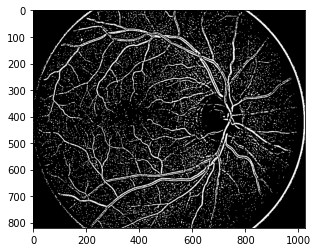

In [12]:
p = "../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/35667_left.jpeg"
img = mpimg.imread(p)
pro = image_preprocessing(img)
filename = os.path.basename(p)
plt.imshow(pro.astype("uint8"), cmap="gray");
# cv2.imwrite(filename, pro)
# plt.imshow(img)

In [13]:
random_img_path = [dir_path+'/'+img for img in random.sample(os.listdir(dir_path), 50)]
random_img_path

['../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/28092_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/38065_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/52_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/16031_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/22947_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/14242_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/33731_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/33325_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/17653_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/23501_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/41233_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_prepro

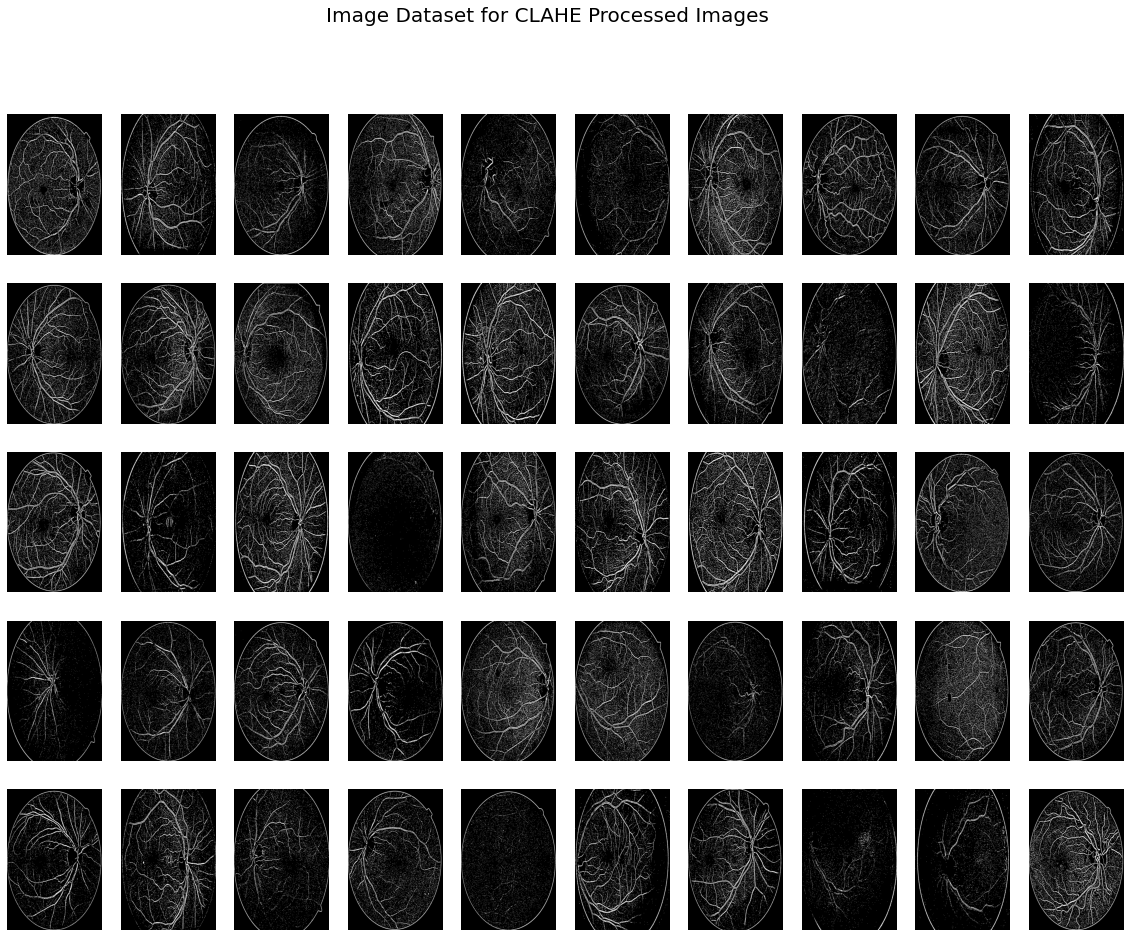

In [14]:
plt.figure(figsize=(20, 15))
plt.suptitle("Image Dataset for CLAHE Processed Images", fontsize=20)

for i in range(1, 51):
    plt.subplot(5, 10, i)
    img = mpimg.imread(random_img_path[i-1])
    img_pro = image_preprocessing(img)
    plt.imshow(img_pro.astype("uint8"), cmap="gray", aspect="auto")
    plt.axis(False);

In [15]:
for i in range(5):
    os.mkdir('./'+class_code[i])

In [16]:
import os
import shutil
res = [[i[1][2], i[1][3]] for i in df_temp.iterrows()]
for i in res:
    des = './'+i[0]+'/'
    src = dir_path+'/'+i[1].split('/')[1]
    shutil.copy(src, des)

In [17]:
train_df_temp = {}
test_df_temp = {}
for i in range(5):
    df = df_temp[df_temp['diagnosis']==i]['id_code'].to_list()
    random.seed(42)
    x = random.sample(df, int(0.8*len(df)))
    for j in x:
        train_df_temp[j] = i
    for j in df:
        if j not in train_df_temp.keys():
            test_df_temp[j] = i
train_df_temp = pd.DataFrame(train_df_temp.items(), columns=['id_code', 'diagnosis']).sample(frac=1, random_state=42)
test_df_temp = pd.DataFrame(test_df_temp.items(), columns=['id_code', 'diagnosis']).sample(frac=1, random_state=42)
train_df_temp

id_code  diagnosis
17599  30986_right          0
5676    9884_right          0
10356   43136_left          0
9463   20029_right          0
428      398_right          0
...            ...        ...
21575  35810_right          1
5390   14877_right          0
860     24292_left          0
15795   26996_left          0
23654   21571_left          2

[28084 rows x 2 columns]

In [18]:
# Taking only 20% of the dataset
train_df_temp_10_per = {}
test_df_temp_10_per = {}
for i in range(5):
    df = train_df_temp[train_df_temp['diagnosis']==i]['id_code'].to_list()
    random.seed(42)
    x = random.sample(df, int(0.2*len(df)))
    for j in x:
        train_df_temp_10_per[j] = i
    for j in df:
        if j not in train_df_temp_10_per.keys():
            test_df_temp_10_per[j] = i
train_df_temp_10_per = pd.DataFrame(train_df_temp_10_per.items(), columns=['id_code', 'diagnosis']).sample(frac=1, random_state=42)
test_df_temp_10_per = pd.DataFrame(test_df_temp_10_per.items(), columns=['id_code', 'diagnosis']).sample(frac=0.05, random_state=4)
train_df_temp_10_per

id_code  diagnosis
4414  18618_right          1
2586   17983_left          0
80       318_left          0
1961   18954_left          0
5437  37354_right          3
...           ...        ...
3772    5729_left          0
5191    4970_left          2
5226   20806_left          2
5390   7329_right          3
860    39330_left          0

[5616 rows x 2 columns]

In [19]:
len(test_df_temp_10_per)

1123

In [20]:
mapping_temp(train_df_temp, root='.'), mapping_temp(test_df_temp, root='.')

(           id_code  diagnosis     label                      path
 17599  30986_right          0     No_DR    No_DR/30986_right.jpeg
 5676    9884_right          0     No_DR     No_DR/9884_right.jpeg
 10356   43136_left          0     No_DR     No_DR/43136_left.jpeg
 9463   20029_right          0     No_DR    No_DR/20029_right.jpeg
 428      398_right          0     No_DR      No_DR/398_right.jpeg
 ...            ...        ...       ...                       ...
 21575  35810_right          1      Mild     Mild/35810_right.jpeg
 5390   14877_right          0     No_DR    No_DR/14877_right.jpeg
 860     24292_left          0     No_DR     No_DR/24292_left.jpeg
 15795   26996_left          0     No_DR     No_DR/26996_left.jpeg
 23654   21571_left          2  Moderate  Moderate/21571_left.jpeg
 
 [28084 rows x 4 columns],
           id_code  diagnosis     label                       path
 6479   34442_left          2  Moderate   Moderate/34442_left.jpeg
 2462   21510_left          0    

In [21]:
mapping_temp(train_df_temp_10_per, root='.'), mapping_temp(test_df_temp_10_per, root='.')

(          id_code  diagnosis     label                      path
 4414  18618_right          1      Mild     Mild/18618_right.jpeg
 2586   17983_left          0     No_DR     No_DR/17983_left.jpeg
 80       318_left          0     No_DR       No_DR/318_left.jpeg
 1961   18954_left          0     No_DR     No_DR/18954_left.jpeg
 5437  37354_right          3    Severe   Severe/37354_right.jpeg
 ...           ...        ...       ...                       ...
 3772    5729_left          0     No_DR      No_DR/5729_left.jpeg
 5191    4970_left          2  Moderate   Moderate/4970_left.jpeg
 5226   20806_left          2  Moderate  Moderate/20806_left.jpeg
 5390   7329_right          3    Severe    Severe/7329_right.jpeg
 860    39330_left          0     No_DR     No_DR/39330_left.jpeg
 
 [5616 rows x 4 columns],
            id_code  diagnosis  label                    path
 14737    4997_left          0  No_DR    No_DR/4997_left.jpeg
 13264  26820_right          0  No_DR  No_DR/26820_right

In [22]:
# Initializing the input size
IMG_SHAPE = (224, 224)
N_SPLIT = 3
EPOCHS = 5

In [23]:
# Defining euclidean distance function to be used as a evaluation metrics
def euclideanDist(img1, img2):
    return backend.sqrt(backend.sum((img1-img2)**2))

def metrics(y_true, y_pred):
    print(classification_report(y_true, y_pred, target_names=classes))
    acc = accuracy_score(y_true, y_pred)
    res = []
    for l in [0,1,2,3,4]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                          np.array(y_pred)==l,
                                                          pos_label=True,
                                                          average=None)
        res.append([classes[l],recall[0],recall[1]])
    df_res = pd.DataFrame(res,columns = ['class','sensitivity','specificity'])
    return df_res, acc

# Function to perform k-fold = 3-fold validation on test model
def validation_k_fold_temp(model_test, k=3, epochs=EPOCHS, n_splits=N_SPLIT, lr=0.001, class_weights=None): 
    kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                    preprocessing_function = image_preprocessing)
    validation_datagen = ImageDataGenerator(rescale = 1./255,
                                            preprocessing_function = image_preprocessing)

    train_y = train_df_temp_10_per['label']
    train_x = train_df_temp_10_per['path']

    # Variable for keeping the count of the splits we're executing
    j = 0
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    histories, acc = [], []
    for train_idx, val_idx in list(kfold.split(train_x,train_y)):
        x_train_df = train_df_temp_10_per.iloc[train_idx]
        x_valid_df = train_df_temp_10_per.iloc[val_idx]
        j+=1
        train_data = train_datagen.flow_from_dataframe(dataframe=x_train_df, 
                                                       directory='./',
                                                       x_col='path',
                                                       y_col='label',
                                                       class_mode="categorical",
                                                       target_size=IMG_SHAPE)

        valid_data = validation_datagen.flow_from_dataframe(dataframe=x_valid_df, 
                                                           directory='./',
                                                           x_col='path',
                                                           y_col='label',
                                                           class_mode="categorical",
                                                           target_size=IMG_SHAPE)
        
        # Initializing the early stopping callback
        es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
        
        # Compile the model
        model_test.compile(loss='categorical_crossentropy',
                          optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                          metrics=[euclideanDist, 'accuracy'])
        
        history = model_test.fit_generator(train_data,
                                           validation_data=valid_data,
                                           epochs=epochs,
                                           validation_steps=len(valid_data),
                                           callbacks=[es])
        histories.append(history.history)
        
        test_datagen = ImageDataGenerator(rescale = 1./255,
                                          preprocessing_function = image_preprocessing)
        test_data = test_datagen.flow_from_dataframe(dataframe=test_df_temp_10_per, 
                                                     directory='./',
                                                     x_col='path',
                                                     y_col='label',
                                                     class_mode="categorical",
                                                     target_size=IMG_SHAPE)
        
        # Evaluate the model
        predictions = model_test.predict_generator(test_data, verbose=1)
        y_preds = np.argmax(predictions, axis=1)
        true_classes = test_data.classes
        
        # evaluate test performance
        print("***Performance on Test data***")    
        df_res, testAcc = metrics(true_classes, y_preds)
        acc.extend([testAcc, df_res])
    return [histories, acc]

In [24]:
# Function to print the metrics
def print_met(model):
    # Evaluation metrics for model
    for i in range(0, len(model), 2):
        print(f"Accuracy: {model[i]}")
        print(model[i+1])
        print("\t\t------------------\n")
        
        
# Function to plot the performance metrics
def plot_result(hist):
    plt.figure(figsize=(20, 10));
    plt.suptitle(f"Performance Metrics", fontsize=20)
    
    c=1
    for i in range(N_SPLIT):
        # Actual and validation losses
        plt.subplot(3, 3, c);
        plt.plot(hist[i]['loss'], label='train')
        plt.plot(hist[i]['val_loss'], label='validation')
        plt.title('Train and val loss curve')
        plt.legend()

        # Actual and validation accuracy
        plt.subplot(3, 3, c+1);
        plt.plot(hist[i]['accuracy'], label='train')
        plt.plot(hist[i]['val_accuracy'], label='validation')
        plt.title('Train and val accuracy curve')
        plt.legend()

        # Actual and validation euclidean distance
        plt.subplot(3, 3, c+2);
        plt.plot(hist[i]['euclideanDist'], label='train')
        plt.plot(hist[i]['val_euclideanDist'], label='validation')
        plt.title('Train and val euclidean distance curve')
        plt.legend()
        c+=3
    plt.tight_layout()

In [25]:
# View random images in the dataset
def view_random_images(root_dir, classes=classes):
    class_paths = [root_dir + "/" + image_class for image_class in classes]
    # print(class_paths)
    images_path = []
    labels = []
    for i in range(len(class_paths)):
        random_images = random.sample(os.listdir(class_paths[i]), 10)
        random_images_path = [class_paths[i]+'/'+img for img in random_images]
        for j in random_images_path:
            images_path.append(j)
            labels.append(classes[i])
    images_path

    plt.figure(figsize=(17, 10))
    plt.suptitle("Image Dataset", fontsize=20)

    for i in range(1, 51):
        plt.subplot(5, 10, i)
        img = mpimg.imread(images_path[i-1])
        plt.imshow(img, aspect="auto")
        plt.title(labels[i-1])
        plt.axis(False);

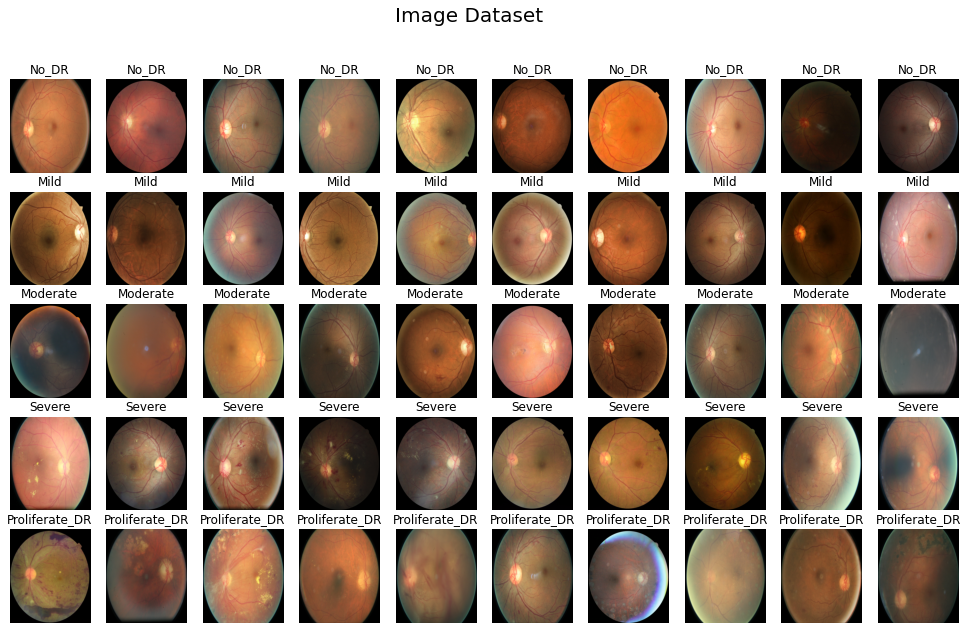

In [26]:
# Observing the images
view_random_images(root_dir='./')

## Modelling (base Models)
We'll use the following ImageNet models for training the images and observe the variations of the accuracy of the predicitions as predicted by the models:
* AlexNet
* DenseNet121
* ResNet50
* InceptionV3
* VGG-16

## 1. AlexNet

In [59]:
# Basic CNN model for AlexNet
model_alexnet = tf.keras.Sequential([
    Conv2D(input_shape=IMG_SHAPE+(3,), filters=96,kernel_size=11,strides=4,activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Conv2D(filters=256,kernel_size=5,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'),
    Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'),
    Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Flatten(),
    Dense(len(classes), activation='softmax')
], name="model_AlexNet")

In [60]:
# Summary of AlexNet model
model_alexnet.summary()

Model: "model_AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_193 (Conv2D)          (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_194 (Conv2D)          (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 10, 10, 384)       1327488   
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 10, 10, 256)     

In [61]:
layer = model_alexnet.layers
for i in range(len(layer)):
    print(i, layer[i].trainable, layer[i].name)

0 True conv2d_193
1 True max_pooling2d_11
2 True conv2d_194
3 True max_pooling2d_12
4 True conv2d_195
5 True conv2d_196
6 True conv2d_197
7 True max_pooling2d_13
8 True dense_12
9 True dropout_6
10 True flatten_1
11 True dense_13


In [62]:
model_alexnet_history, model_alexnet_result = validation_k_fold_temp(model_alexnet, class_weights=None)

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 89s 752ms/step - loss: 0.9262 - euclideanDist: 3.7732 - accuracy: 0.7161 - val_loss: 0.8703 - val_euclideanDist: 3.6758 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 87s 744ms/step - loss: 0.8734 - euclideanDist: 3.7018 - accuracy: 0.7350 - val_loss: 0.8753 - val_euclideanDist: 3.6669 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 86s 736ms/step - loss: 0.8788 - euclideanDist: 3.7082 - accuracy: 0.7350 - val_loss: 0.8701 - val_euclideanDist: 3.6723 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 87s 747ms/step - loss: 0.8739 - euclideanDist: 3.7033 - accuracy: 0.7350 - val_loss: 0.8679 - val_euclideanDist: 3.6565 - val_accuracy: 0.7350
Epoch 5/5
117/117 [==============================] - 87s 744ms/step - loss: 0.8725 - euclideanDist: 3.7010 - accuracy: 0.7350 - val_loss: 0.8715 - val_euclideanDist: 3.6914 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 17s 464ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

Epoch 1/5
117/117 [==============================] - 88s 750ms/step - loss: 0.8766 - euclideanDist: 3.7017 - accuracy: 0.7350 - val_loss: 0.8727 - val_euclideanDist: 3.6879 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 86s 741ms/step - loss: 0.8722 - euclideanDist: 3.6958 - accuracy: 0.7350 - val_loss: 0.8681 - val_euclideanDist: 3.6857 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 87s 746ms/step - loss: 0.8723 - euclideanDist: 3.6960 - accuracy: 0.7350 - val_loss: 0.8671 - val_euclideanDist: 3.6762 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 87s 742ms/step - loss: 0.8732 - euclideanDist: 3.7007 - accuracy: 0.7350 - val_loss: 0.8708 - val_euclideanDist: 3.6768 - val_accuracy: 0.7350
Epoch 5/5
117/117 [==============================] - 87s 745ms/step - loss: 0.8728 - euclideanDist: 3.7046 - accuracy: 0.7350 - val_loss: 0.8760 - val_euclideanDist: 3.6938 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 17s 482ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

Epoch 1/5
117/117 [==============================] - 88s 751ms/step - loss: 0.8722 - euclideanDist: 3.6973 - accuracy: 0.7350 - val_loss: 0.8680 - val_euclideanDist: 3.6788 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 86s 741ms/step - loss: 0.8698 - euclideanDist: 3.6979 - accuracy: 0.7350 - val_loss: 0.8682 - val_euclideanDist: 3.6706 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 86s 741ms/step - loss: 0.8700 - euclideanDist: 3.6924 - accuracy: 0.7350 - val_loss: 0.8705 - val_euclideanDist: 3.6757 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 87s 749ms/step - loss: 0.8735 - euclideanDist: 3.6988 - accuracy: 0.7350 - val_loss: 0.8708 - val_euclideanDist: 3.6815 - val_accuracy: 0.7350
Epoch 5/5
117/117 [==============================] - 87s 741ms/step - loss: 0.8727 - euclideanDist: 3.7022 - accuracy: 0.7350 - val_loss: 0.8674 - val_euclideanDist: 3.6751 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 18s 493ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [63]:
# Print the metrics
print_met(model_alexnet_result)

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------



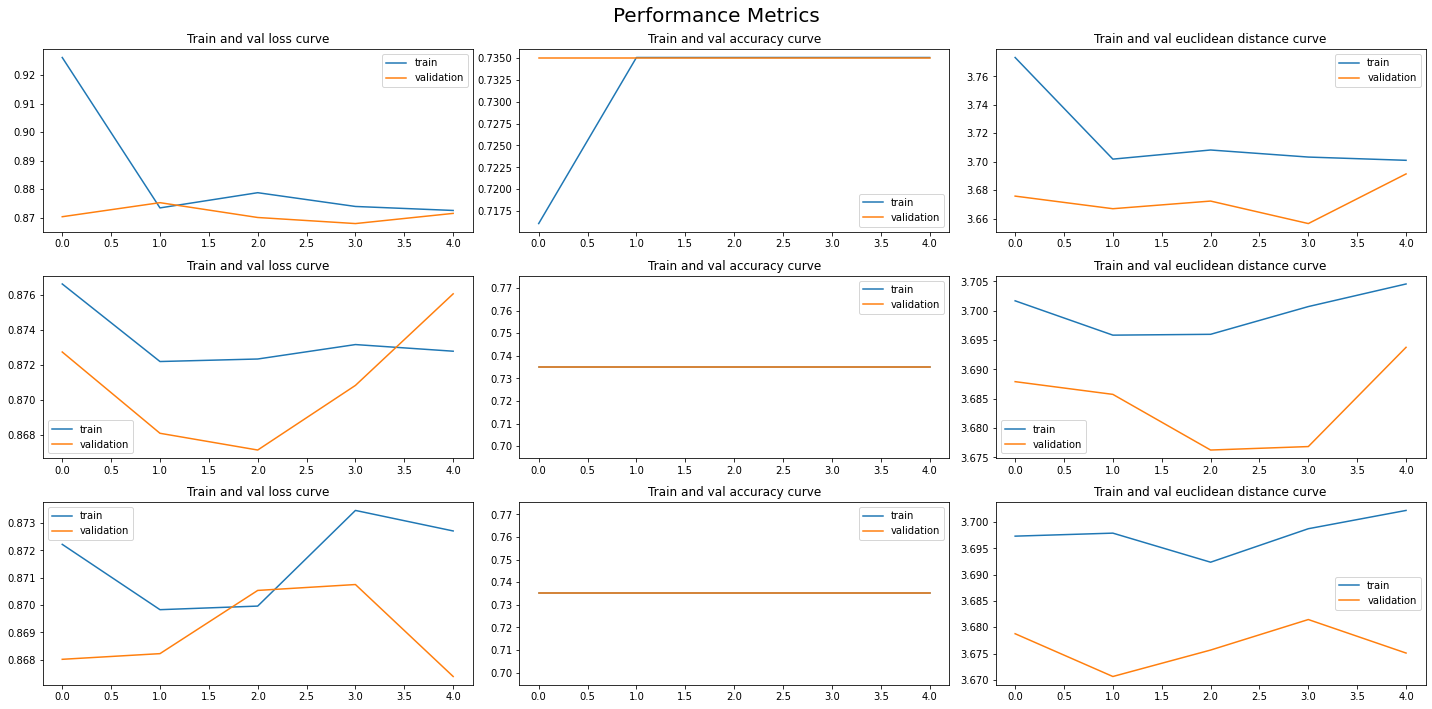

In [64]:
# Performance metrics for AlexNet
plot_result(model_alexnet_history)

## 2. DenseNet

In [27]:
# Basic architecture of DenseNet
model_densenet=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_densenet.output
x= GlobalMaxPooling2D()(x)
x= BatchNormalization()(x)
x= Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_denseNet=tf.keras.Model(inputs=model_densenet.input,outputs=output)

2022-09-24 14:13:25.183460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:13:25.272839: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:13:25.273659: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-24 14:13:25.275372: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

29097984/29084464 [==============================] - 0s 0us/step


In [28]:
# Summary of the denseNet model
model_denseNet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [29]:
layers = model_denseNet.layers
for i in range(len(layers)):
    print(i, layers[i].trainable, layers[i].name)

0 True input_1
1 True zero_padding2d
2 True conv1/conv
3 True conv1/bn
4 True conv1/relu
5 True zero_padding2d_1
6 True pool1
7 True conv2_block1_0_bn
8 True conv2_block1_0_relu
9 True conv2_block1_1_conv
10 True conv2_block1_1_bn
11 True conv2_block1_1_relu
12 True conv2_block1_2_conv
13 True conv2_block1_concat
14 True conv2_block2_0_bn
15 True conv2_block2_0_relu
16 True conv2_block2_1_conv
17 True conv2_block2_1_bn
18 True conv2_block2_1_relu
19 True conv2_block2_2_conv
20 True conv2_block2_concat
21 True conv2_block3_0_bn
22 True conv2_block3_0_relu
23 True conv2_block3_1_conv
24 True conv2_block3_1_bn
25 True conv2_block3_1_relu
26 True conv2_block3_2_conv
27 True conv2_block3_concat
28 True conv2_block4_0_bn
29 True conv2_block4_0_relu
30 True conv2_block4_1_conv
31 True conv2_block4_1_bn
32 True conv2_block4_1_relu
33 True conv2_block4_2_conv
34 True conv2_block4_concat
35 True conv2_block5_0_bn
36 True conv2_block5_0_relu
37 True conv2_block5_1_conv
38 True conv2_block5_1_bn
3

In [30]:
# Freezing the base model
for layer in model_denseNet.layers[:-5]:
    layer.trainable=False

In [31]:
model_denseNet_history, model_denseNet_result = validation_k_fold_temp(model_denseNet, class_weights=None)

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-09-24 14:13:31.814419: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-09-24 14:13:38.475120: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


117/117 [==============================] - 114s 874ms/step - loss: 1.1254 - euclideanDist: 4.0700 - accuracy: 0.6480 - val_loss: 1.0511 - val_euclideanDist: 3.8289 - val_accuracy: 0.7340
Epoch 2/5
117/117 [==============================] - 91s 782ms/step - loss: 0.7982 - euclideanDist: 3.5737 - accuracy: 0.7332 - val_loss: 0.9003 - val_euclideanDist: 3.7419 - val_accuracy: 0.7265
Epoch 3/5
117/117 [==============================] - 97s 829ms/step - loss: 0.6745 - euclideanDist: 3.3359 - accuracy: 0.7612 - val_loss: 0.9045 - val_euclideanDist: 3.7314 - val_accuracy: 0.7212
Epoch 4/5
117/117 [==============================] - 90s 771ms/step - loss: 0.6163 - euclideanDist: 3.2186 - accuracy: 0.7724 - val_loss: 0.9244 - val_euclideanDist: 3.7327 - val_accuracy: 0.7265
Epoch 5/5
117/117 [==============================] - 90s 770ms/step - loss: 0.5335 - euclideanDist: 3.0159 - accuracy: 0.8042 - val_loss: 0.9543 - val_euclideanDist: 3.7620 - val_accuracy: 0.7190
Found 1123 validated image fi

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 22s 566ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.16      0.03      0.05       157
      Moderate       0.73      0.96      0.83       820
        Severe       0.12      0.03      0.05        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.71      1123
     macro avg       0.20      0.20      0.19      1123
  weighted avg       0.56      0.71      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 99s 803ms/step - loss: 0.7727 - euclideanDist: 3.4452 - accuracy: 0.7543 - val_loss: 0.4909 - val_euclideanDist: 2.8888 - val_accuracy: 0.8034
Epoch 2/5
117/117 [==============================] - 91s 778ms/step - loss: 0.6376 - euclideanDist: 3.2155 - accuracy: 0.7845 - val_loss: 0.5070 - val_euclideanDist: 2.9539 - val_accuracy: 0.7986
Epoch 3/5
117/117 [==============================] - 91s 778ms/step - loss: 0.5324 - euclideanDist: 2.9713 - accuracy: 0.8122 - val_loss: 0.5228 - val_euclideanDist: 2.9669 - val_accuracy: 0.8013
Epoch 4/5
117/117 [==============================] - 90s 768ms/step - loss: 0.4734 - euclideanDist: 2.8186 - accuracy: 0.8267 - val_loss: 0.5962 - val_euclideanDist: 3.1745 - val_accuracy: 0.7783
Epoch 5/5
117/117 [==============================] - 89s 763ms/step - loss: 0.4083 - euclideanDist: 2.6062 - accuracy: 0.8555 - val_loss: 0.6140 - val_euclideanDist: 3.1969 - val_accuracy: 0.7756
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 20s 502ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.22      0.07      0.11       157
      Moderate       0.73      0.95      0.83       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.70      1123
     macro avg       0.19      0.20      0.19      1123
  weighted avg       0.57      0.70      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 97s 788ms/step - loss: 0.5686 - euclideanDist: 3.0750 - accuracy: 0.7967 - val_loss: 0.2376 - val_euclideanDist: 1.8831 - val_accuracy: 0.9268
Epoch 2/5
117/117 [==============================] - 89s 764ms/step - loss: 0.4462 - euclideanDist: 2.7475 - accuracy: 0.8376 - val_loss: 0.2452 - val_euclideanDist: 1.9263 - val_accuracy: 0.9257
Epoch 3/5
117/117 [==============================] - 89s 762ms/step - loss: 0.3742 - euclideanDist: 2.5055 - accuracy: 0.8673 - val_loss: 0.2969 - val_euclideanDist: 2.3035 - val_accuracy: 0.8729
Epoch 4/5
117/117 [==============================] - 90s 773ms/step - loss: 0.3278 - euclideanDist: 2.3199 - accuracy: 0.8865 - val_loss: 0.2977 - val_euclideanDist: 2.2761 - val_accuracy: 0.8825
Epoch 5/5
117/117 [==============================] - 91s 778ms/step - loss: 0.2656 - euclideanDist: 2.0818 - accuracy: 0.9068 - val_loss: 0.3061 - val_euclideanDist: 2.2684 - val_accuracy: 0.8889
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 19s 486ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.11      0.01      0.02        87
          Mild       0.07      0.04      0.06       157
      Moderate       0.72      0.88      0.79       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.65      1123
     macro avg       0.18      0.19      0.17      1123
  weighted avg       0.55      0.65      0.59      1123



In [32]:
# Evaluation metrics for denseNet model
print_met(model_denseNet_result)

Accuracy: 0.7079252003561888
            class  sensitivity  specificity
0           No_DR     0.996139     0.000000
1            Mild     0.973085     0.031847
2        Moderate     0.046205     0.962195
3          Severe     0.993566     0.028571
4  Proliferate_DR     0.998180     0.000000
		------------------

Accuracy: 0.703472840605521
            class  sensitivity  specificity
0           No_DR     0.995174     0.000000
1            Mild     0.959627     0.070064
2        Moderate     0.066007     0.950000
3          Severe     0.997243     0.000000
4  Proliferate_DR     0.997270     0.000000
		------------------

Accuracy: 0.6509349955476402
            class  sensitivity  specificity
0           No_DR     0.992278     0.011494
1            Mild     0.907867     0.044586
2        Moderate     0.079208     0.881707
3          Severe     0.991728     0.000000
4  Proliferate_DR     0.993631     0.000000
		------------------



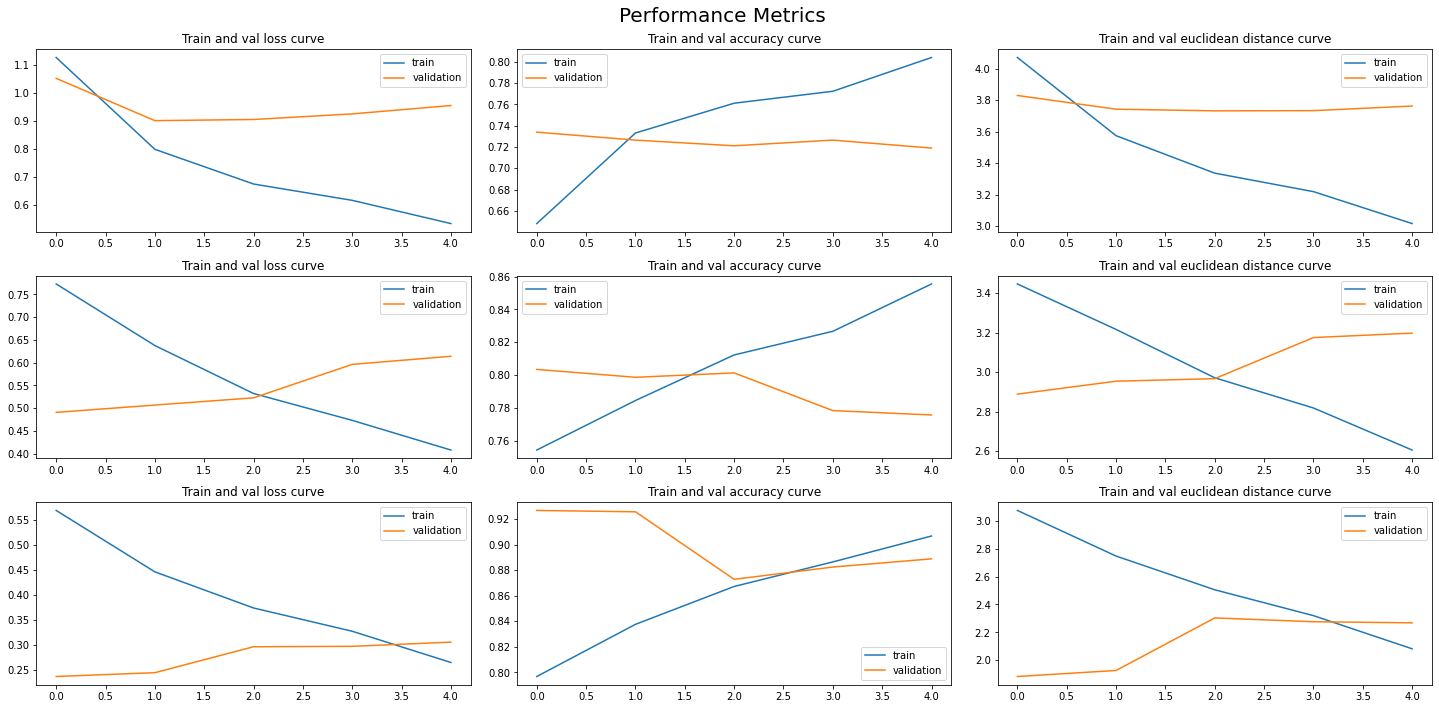

In [33]:
# Visualizing the evaluation metrics
plot_result(model_denseNet_history)

## 3. ResNet50

In [34]:
# Basic architecture model of ResNet50
model_resnet50=ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_resnet50.output
x= GlobalMaxPooling2D()(x)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_resNet=tf.keras.Model(inputs=model_resnet50.input,outputs=output)

94781440/94765736 [==============================] - 4s 0us/step


In [35]:
l = model_resNet.layers
for i in range(len(l)):
    print(i, l[i].trainable, l[i].name)

0 True input_2
1 True conv1_pad
2 True conv1_conv
3 True conv1_bn
4 True conv1_relu
5 True pool1_pad
6 True pool1_pool
7 True conv2_block1_1_conv
8 True conv2_block1_1_bn
9 True conv2_block1_1_relu
10 True conv2_block1_2_conv
11 True conv2_block1_2_bn
12 True conv2_block1_2_relu
13 True conv2_block1_0_conv
14 True conv2_block1_3_conv
15 True conv2_block1_0_bn
16 True conv2_block1_3_bn
17 True conv2_block1_add
18 True conv2_block1_out
19 True conv2_block2_1_conv
20 True conv2_block2_1_bn
21 True conv2_block2_1_relu
22 True conv2_block2_2_conv
23 True conv2_block2_2_bn
24 True conv2_block2_2_relu
25 True conv2_block2_3_conv
26 True conv2_block2_3_bn
27 True conv2_block2_add
28 True conv2_block2_out
29 True conv2_block3_1_conv
30 True conv2_block3_1_bn
31 True conv2_block3_1_relu
32 True conv2_block3_2_conv
33 True conv2_block3_2_bn
34 True conv2_block3_2_relu
35 True conv2_block3_3_conv
36 True conv2_block3_3_bn
37 True conv2_block3_add
38 True conv2_block3_out
39 True conv3_block1_1_con

In [36]:
# Summary of the ResNet50 model
model_resNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [37]:
# Freezing the base model
for layer in model_resNet.layers[:-5]:
    layer.trainable=False

In [38]:
model_resNet_history, model_resNet_result = validation_k_fold_temp(model_resNet, class_weights=None)

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 95s 778ms/step - loss: 1.3532 - euclideanDist: 4.2171 - accuracy: 0.6351 - val_loss: 1.0406 - val_euclideanDist: 3.7972 - val_accuracy: 0.7318
Epoch 2/5
117/117 [==============================] - 90s 771ms/step - loss: 0.8715 - euclideanDist: 3.6738 - accuracy: 0.7126 - val_loss: 0.9663 - val_euclideanDist: 3.8066 - val_accuracy: 0.7137
Epoch 3/5
117/117 [==============================] - 90s 768ms/step - loss: 0.6800 - euclideanDist: 3.3212 - accuracy: 0.7636 - val_loss: 0.9598 - val_euclideanDist: 3.7923 - val_accuracy: 0.7137
Epoch 4/5
117/117 [==============================] - 90s 771ms/step - loss: 0.5712 - euclideanDist: 3.0836 - accuracy: 0.7909 - val_loss: 0.9900 - val_euclideanDist: 3.7620 - val_accuracy: 0.7254
Epoch 5/5
117/117 [==============================] - 90s 769ms/step - loss: 0.4846 - euclideanDist: 2.8393 - accuracy: 0.8288 - val_loss: 1.0398 - val_euclideanDist: 3.8227 - val_accuracy: 0.7142
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 18s 485ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.12      0.03      0.05       157
      Moderate       0.73      0.94      0.82       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.69      1123
     macro avg       0.17      0.19      0.17      1123
  weighted avg       0.55      0.69      0.61      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

Epoch 1/5
117/117 [==============================] - 94s 784ms/step - loss: 0.8298 - euclideanDist: 3.5384 - accuracy: 0.7415 - val_loss: 0.5154 - val_euclideanDist: 2.9386 - val_accuracy: 0.7949
Epoch 2/5
117/117 [==============================] - 90s 770ms/step - loss: 0.6736 - euclideanDist: 3.2622 - accuracy: 0.7764 - val_loss: 0.5384 - val_euclideanDist: 3.0202 - val_accuracy: 0.7986
Epoch 3/5
117/117 [==============================] - 90s 772ms/step - loss: 0.5479 - euclideanDist: 3.0005 - accuracy: 0.8077 - val_loss: 0.5846 - val_euclideanDist: 3.1099 - val_accuracy: 0.7858
Epoch 4/5
117/117 [==============================] - 91s 779ms/step - loss: 0.4697 - euclideanDist: 2.8006 - accuracy: 0.8296 - val_loss: 0.6147 - val_euclideanDist: 3.1544 - val_accuracy: 0.7810
Epoch 5/5
117/117 [==============================] - 90s 772ms/step - loss: 0.3779 - euclideanDist: 2.4997 - accuracy: 0.8659 - val_loss: 0.6545 - val_euclideanDist: 3.1881 - val_accuracy: 0.7719
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 19s 509ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.12      0.06      0.08       157
      Moderate       0.73      0.91      0.81       820
        Severe       0.14      0.03      0.05        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.67      1123
     macro avg       0.20      0.20      0.19      1123
  weighted avg       0.56      0.67      0.60      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 94s 780ms/step - loss: 0.6112 - euclideanDist: 3.1029 - accuracy: 0.7954 - val_loss: 0.2205 - val_euclideanDist: 1.7428 - val_accuracy: 0.9471
Epoch 2/5
117/117 [==============================] - 89s 760ms/step - loss: 0.4698 - euclideanDist: 2.7856 - accuracy: 0.8317 - val_loss: 0.2119 - val_euclideanDist: 1.7346 - val_accuracy: 0.9423
Epoch 3/5
117/117 [==============================] - 89s 765ms/step - loss: 0.3681 - euclideanDist: 2.4913 - accuracy: 0.8654 - val_loss: 0.2700 - val_euclideanDist: 2.0269 - val_accuracy: 0.9177
Epoch 4/5
117/117 [==============================] - 90s 768ms/step - loss: 0.3317 - euclideanDist: 2.3316 - accuracy: 0.8838 - val_loss: 0.2847 - val_euclideanDist: 2.1369 - val_accuracy: 0.9033
Epoch 5/5
117/117 [==============================] - 89s 767ms/step - loss: 0.2494 - euclideanDist: 2.0031 - accuracy: 0.9119 - val_loss: 0.2900 - val_euclideanDist: 2.1340 - val_accuracy: 0.9001
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 18s 478ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.20      0.10      0.14        87
          Mild       0.11      0.07      0.09       157
      Moderate       0.73      0.85      0.79       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.64      1123
     macro avg       0.21      0.21      0.20      1123
  weighted avg       0.56      0.64      0.60      1123



In [39]:
# Evaluation metrics for resNet
print_met(model_resNet_result)

Accuracy: 0.691006233303651
            class  sensitivity  specificity
0           No_DR     0.982625     0.000000
1            Mild     0.960663     0.031847
2        Moderate     0.056106     0.940244
3          Severe     0.995404     0.000000
4  Proliferate_DR     1.000000     0.000000
		------------------

Accuracy: 0.6714158504007124
            class  sensitivity  specificity
0           No_DR     0.981660     0.000000
1            Mild     0.929607     0.057325
2        Moderate     0.102310     0.907317
3          Severe     0.994485     0.028571
4  Proliferate_DR     0.996360     0.000000
		------------------

Accuracy: 0.6402493321460374
            class  sensitivity  specificity
0           No_DR     0.964286     0.103448
1            Mild     0.912008     0.070064
2        Moderate     0.138614     0.852439
3          Severe     0.985294     0.000000
4  Proliferate_DR     0.995450     0.000000
		------------------



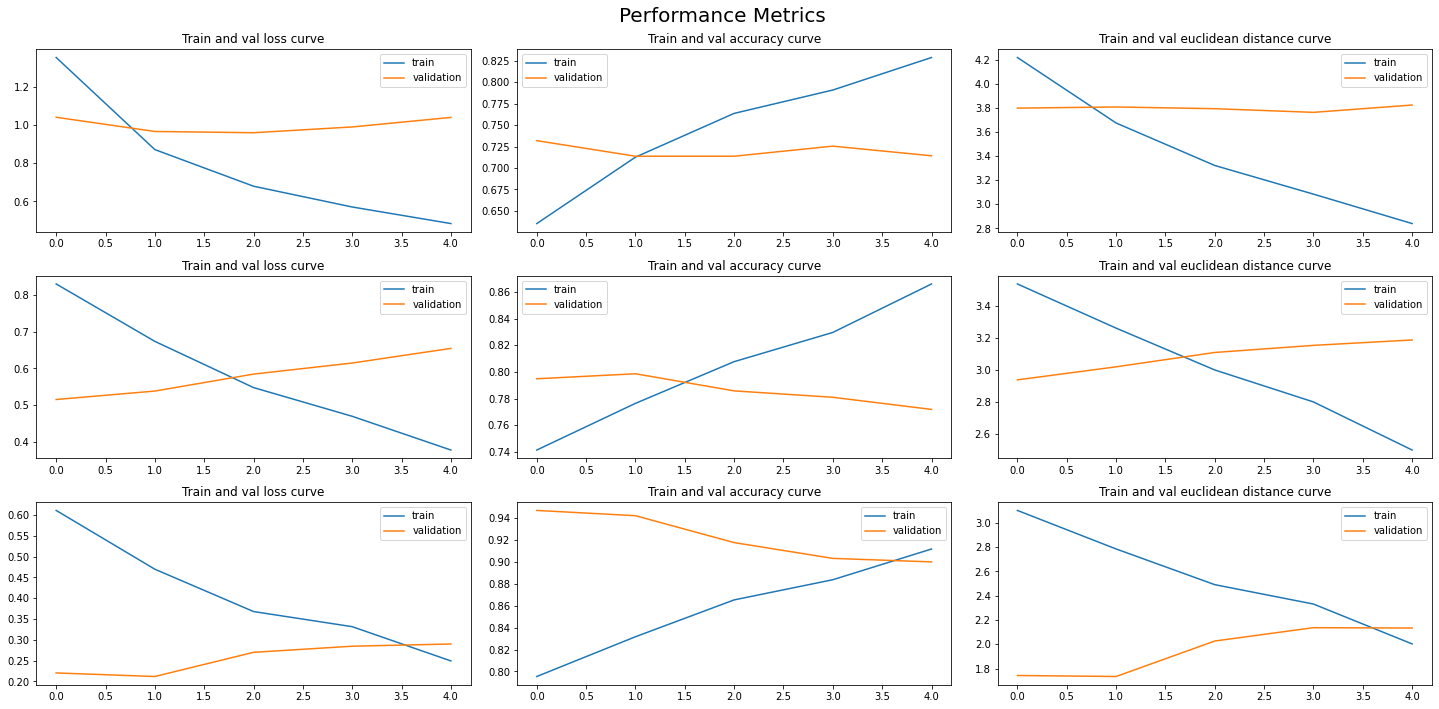

In [40]:
# Visualizing the evaluation metrics
plot_result(model_resNet_history)

## 4. InceptionV3

In [46]:
# Basic architecture model of InceptionV3
model_inception=InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_inception.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_inceptionV3=tf.keras.Model(inputs=model_inception.input,outputs=output)

In [47]:
# Summary of InceptionV3
model_inceptionV3.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_97 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_97[0][0]     
____________________________________________________________________________________________

In [48]:
# Freezing the base model
for layer in model_inceptionV3.layers[:-5]:
    layer.trainable=False

In [49]:
model_inception_history, model_inception_result = validation_k_fold_temp(model_inceptionV3,class_weights=None)

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 94s 774ms/step - loss: 1.7057 - euclideanDist: 4.4913 - accuracy: 0.5911 - val_loss: 1.0069 - val_euclideanDist: 3.7763 - val_accuracy: 0.7334
Epoch 2/5
117/117 [==============================] - 89s 759ms/step - loss: 1.1053 - euclideanDist: 3.9492 - accuracy: 0.6717 - val_loss: 0.9560 - val_euclideanDist: 3.7673 - val_accuracy: 0.7244
Epoch 3/5
117/117 [==============================] - 89s 763ms/step - loss: 0.8708 - euclideanDist: 3.6471 - accuracy: 0.7147 - val_loss: 1.0045 - val_euclideanDist: 3.7809 - val_accuracy: 0.7276
Epoch 4/5
117/117 [==============================] - 89s 766ms/step - loss: 0.7048 - euclideanDist: 3.4086 - accuracy: 0.7436 - val_loss: 1.0145 - val_euclideanDist: 3.7847 - val_accuracy: 0.7190
Epoch 5/5
117/117 [==============================] - 89s 763ms/step - loss: 0.6275 - euclideanDist: 3.2595 - accuracy: 0.7714 - val_loss: 1.0643 - val_euclideanDist: 3.8329 - val_accuracy: 0.7089
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 19s 489ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.07      0.02      0.04        87
          Mild       0.10      0.03      0.04       157
      Moderate       0.73      0.94      0.82       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.69      1123
     macro avg       0.18      0.20      0.18      1123
  weighted avg       0.55      0.69      0.61      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 95s 777ms/step - loss: 0.9652 - euclideanDist: 3.7640 - accuracy: 0.6966 - val_loss: 0.6975 - val_euclideanDist: 3.3578 - val_accuracy: 0.7569
Epoch 2/5
117/117 [==============================] - 89s 759ms/step - loss: 0.7802 - euclideanDist: 3.4981 - accuracy: 0.7388 - val_loss: 0.6831 - val_euclideanDist: 3.3619 - val_accuracy: 0.7553
Epoch 3/5
117/117 [==============================] - 89s 766ms/step - loss: 0.6648 - euclideanDist: 3.3296 - accuracy: 0.7642 - val_loss: 0.8005 - val_euclideanDist: 3.5355 - val_accuracy: 0.7463
Epoch 4/5
117/117 [==============================] - 88s 754ms/step - loss: 0.6101 - euclideanDist: 3.2249 - accuracy: 0.7703 - val_loss: 0.7907 - val_euclideanDist: 3.4964 - val_accuracy: 0.7479
Epoch 5/5
117/117 [==============================] - 88s 758ms/step - loss: 0.5419 - euclideanDist: 3.0412 - accuracy: 0.7975 - val_loss: 0.8078 - val_euclideanDist: 3.5420 - val_accuracy: 0.7334
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 19s 484ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.23      0.03      0.06        87
          Mild       0.22      0.10      0.13       157
      Moderate       0.74      0.93      0.82       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.70      1123
     macro avg       0.24      0.21      0.20      1123
  weighted avg       0.59      0.70      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 95s 780ms/step - loss: 0.7591 - euclideanDist: 3.4861 - accuracy: 0.7439 - val_loss: 0.4546 - val_euclideanDist: 2.8226 - val_accuracy: 0.8178
Epoch 2/5
117/117 [==============================] - 89s 761ms/step - loss: 0.6269 - euclideanDist: 3.2320 - accuracy: 0.7722 - val_loss: 0.4644 - val_euclideanDist: 2.8695 - val_accuracy: 0.8168
Epoch 3/5
117/117 [==============================] - 89s 761ms/step - loss: 0.5617 - euclideanDist: 3.0889 - accuracy: 0.7935 - val_loss: 0.5336 - val_euclideanDist: 3.0475 - val_accuracy: 0.7906
Epoch 4/5
117/117 [==============================] - 88s 754ms/step - loss: 0.5033 - euclideanDist: 2.9436 - accuracy: 0.8093 - val_loss: 0.5522 - val_euclideanDist: 3.1040 - val_accuracy: 0.7821
Epoch 5/5
117/117 [==============================] - 88s 758ms/step - loss: 0.4351 - euclideanDist: 2.7399 - accuracy: 0.8365 - val_loss: 0.5922 - val_euclideanDist: 3.1477 - val_accuracy: 0.7826
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 19s 490ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.06      0.01      0.02        87
          Mild       0.22      0.08      0.11       157
      Moderate       0.73      0.93      0.82       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.69      1123
     macro avg       0.20      0.20      0.19      1123
  weighted avg       0.57      0.69      0.62      1123



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [50]:
# Evaluation metrics for InceptionV3
print_met(model_inception_result)

Accuracy: 0.6901157613535174
            class  sensitivity  specificity
0           No_DR     0.975869     0.022989
1            Mild     0.963768     0.025478
2        Moderate     0.066007     0.937805
3          Severe     0.999081     0.000000
4  Proliferate_DR     0.996360     0.000000
		------------------

Accuracy: 0.6954585930543188
            class  sensitivity  specificity
0           No_DR     0.990347     0.034483
1            Mild     0.946170     0.095541
2        Moderate     0.092409     0.930488
3          Severe     0.997243     0.000000
4  Proliferate_DR     0.998180     0.000000
		------------------

Accuracy: 0.6918967052537845
            class  sensitivity  specificity
0           No_DR     0.983591     0.011494
1            Mild     0.956522     0.076433
2        Moderate     0.089109     0.931707
3          Severe     0.989890     0.000000
4  Proliferate_DR     1.000000     0.000000
		------------------



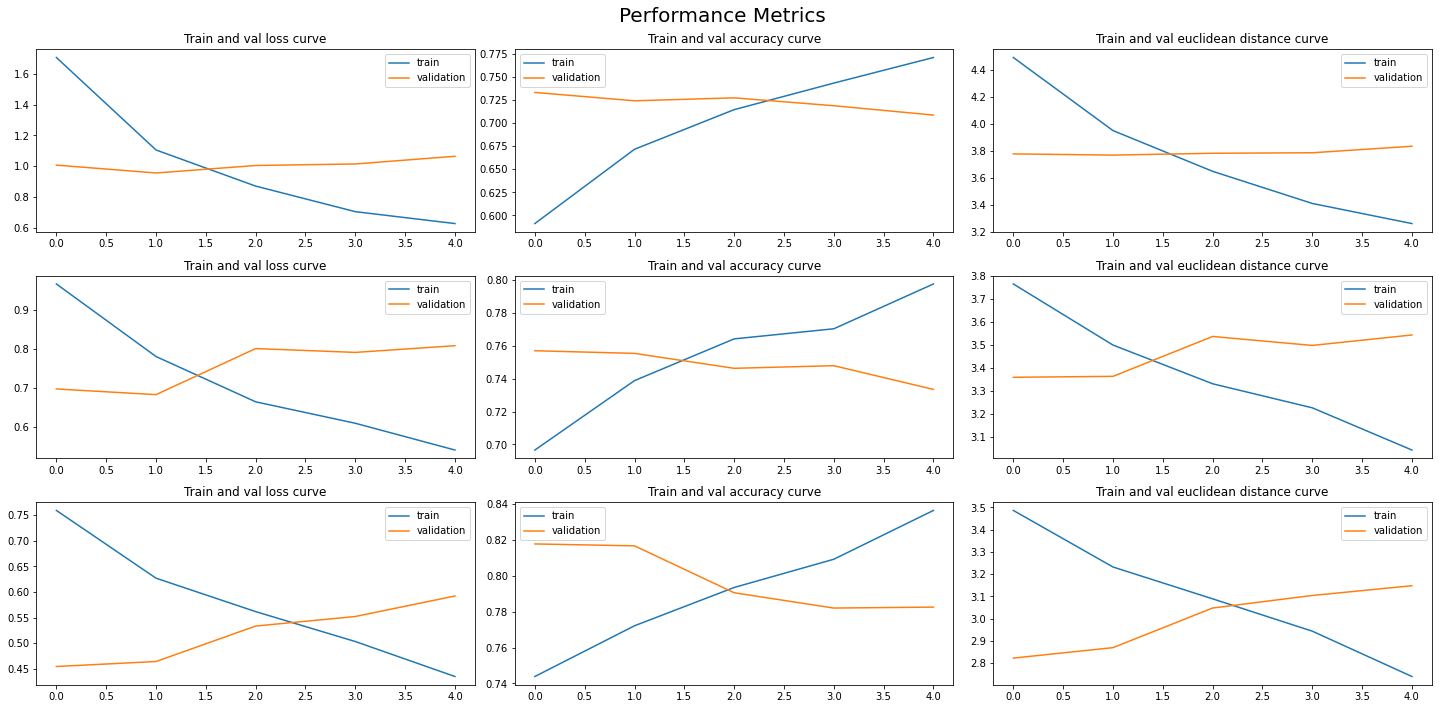

In [51]:
# Visualizing the evaluation metrics
plot_result(model_inception_history)

## 5. VGG-16

In [52]:
# Basic architecture model of VGG16
model_vgg=VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_vgg.output
x= GlobalAveragePooling2D()(x)
x= Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_vgg=tf.keras.Model(inputs=model_vgg.input,outputs=output)

58900480/58889256 [==============================] - 0s 0us/step


In [53]:
# Summary of VGG16 model
model_vgg.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [54]:
# Freezing the base model
for layer in model_vgg.layers[:-5]:
    layer.trainable=False

In [55]:
model_vgg_history, model_vgg_result = validation_k_fold_temp(model_vgg, class_weights=None)

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
117/117 [==============================] - 95s 784ms/step - loss: 0.9319 - euclideanDist: 3.7974 - accuracy: 0.7220 - val_loss: 0.8649 - val_euclideanDist: 3.6799 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 89s 759ms/step - loss: 0.8811 - euclideanDist: 3.7171 - accuracy: 0.7350 - val_loss: 0.8526 - val_euclideanDist: 3.6479 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 89s 764ms/step - loss: 0.8739 - euclideanDist: 3.7023 - accuracy: 0.7350 - val_loss: 0.8475 - val_euclideanDist: 3.6434 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 89s 766ms/step - loss: 0.8716 - euclideanDist: 3.7070 - accuracy: 0.7350 - val_loss: 0.8559 - val_euclideanDist: 3.6581 - val_accuracy: 0.7350
Epoch 5/5
117/117 [==============================] - 90s 770ms/step - loss: 0.8643 - euclideanDist: 3.6973 - accuracy: 0.7350 - val_loss: 0.8448 - val_euclideanDist: 3.6354 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 18s 484ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

Epoch 1/5
117/117 [==============================] - 90s 765ms/step - loss: 0.8652 - euclideanDist: 3.6952 - accuracy: 0.7350 - val_loss: 0.8398 - val_euclideanDist: 3.6278 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 90s 768ms/step - loss: 0.8616 - euclideanDist: 3.6998 - accuracy: 0.7350 - val_loss: 0.8436 - val_euclideanDist: 3.6354 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 89s 766ms/step - loss: 0.8551 - euclideanDist: 3.6779 - accuracy: 0.7350 - val_loss: 0.8301 - val_euclideanDist: 3.6287 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 89s 762ms/step - loss: 0.8518 - euclideanDist: 3.6817 - accuracy: 0.7350 - val_loss: 0.8482 - val_euclideanDist: 3.6704 - val_accuracy: 0.7350
Epoch 5/5
117/117 [==============================] - 90s 768ms/step - loss: 0.8537 - euclideanDist: 3.6812 - accuracy: 0.7350 - val_loss: 0.8272 - val_euclideanDist: 3.6152 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 18s 495ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123

Found 3744 validated image filenames belonging to 5 classes.
Found 1872 validated image filenames belonging to 5 classes.


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

Epoch 1/5
117/117 [==============================] - 91s 775ms/step - loss: 0.8506 - euclideanDist: 3.6751 - accuracy: 0.7350 - val_loss: 0.8293 - val_euclideanDist: 3.6133 - val_accuracy: 0.7350
Epoch 2/5
117/117 [==============================] - 88s 756ms/step - loss: 0.8437 - euclideanDist: 3.6593 - accuracy: 0.7353 - val_loss: 0.8308 - val_euclideanDist: 3.6213 - val_accuracy: 0.7350
Epoch 3/5
117/117 [==============================] - 89s 760ms/step - loss: 0.8473 - euclideanDist: 3.6716 - accuracy: 0.7353 - val_loss: 0.8287 - val_euclideanDist: 3.6233 - val_accuracy: 0.7350
Epoch 4/5
117/117 [==============================] - 89s 762ms/step - loss: 0.8449 - euclideanDist: 3.6670 - accuracy: 0.7361 - val_loss: 0.8314 - val_euclideanDist: 3.6320 - val_accuracy: 0.7340
Epoch 5/5
117/117 [==============================] - 89s 766ms/step - loss: 0.8441 - euclideanDist: 3.6719 - accuracy: 0.7353 - val_loss: 0.8338 - val_euclideanDist: 3.6269 - val_accuracy: 0.7350
Found 1123 validated

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


36/36 [==============================] - 17s 473ms/step
***Performance on Test data***
                precision    recall  f1-score   support

         No_DR       0.00      0.00      0.00        87
          Mild       0.00      0.00      0.00       157
      Moderate       0.73      1.00      0.84       820
        Severe       0.00      0.00      0.00        35
Proliferate_DR       0.00      0.00      0.00        24

      accuracy                           0.73      1123
     macro avg       0.15      0.20      0.17      1123
  weighted avg       0.53      0.73      0.62      1123



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [56]:
# Evaluate metrics for VGG16
print_met(model_vgg_result)

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------

Accuracy: 0.730186999109528
            class  sensitivity  specificity
0           No_DR          1.0          0.0
1            Mild          1.0          0.0
2        Moderate          0.0          1.0
3          Severe          1.0          0.0
4  Proliferate_DR          1.0          0.0
		------------------



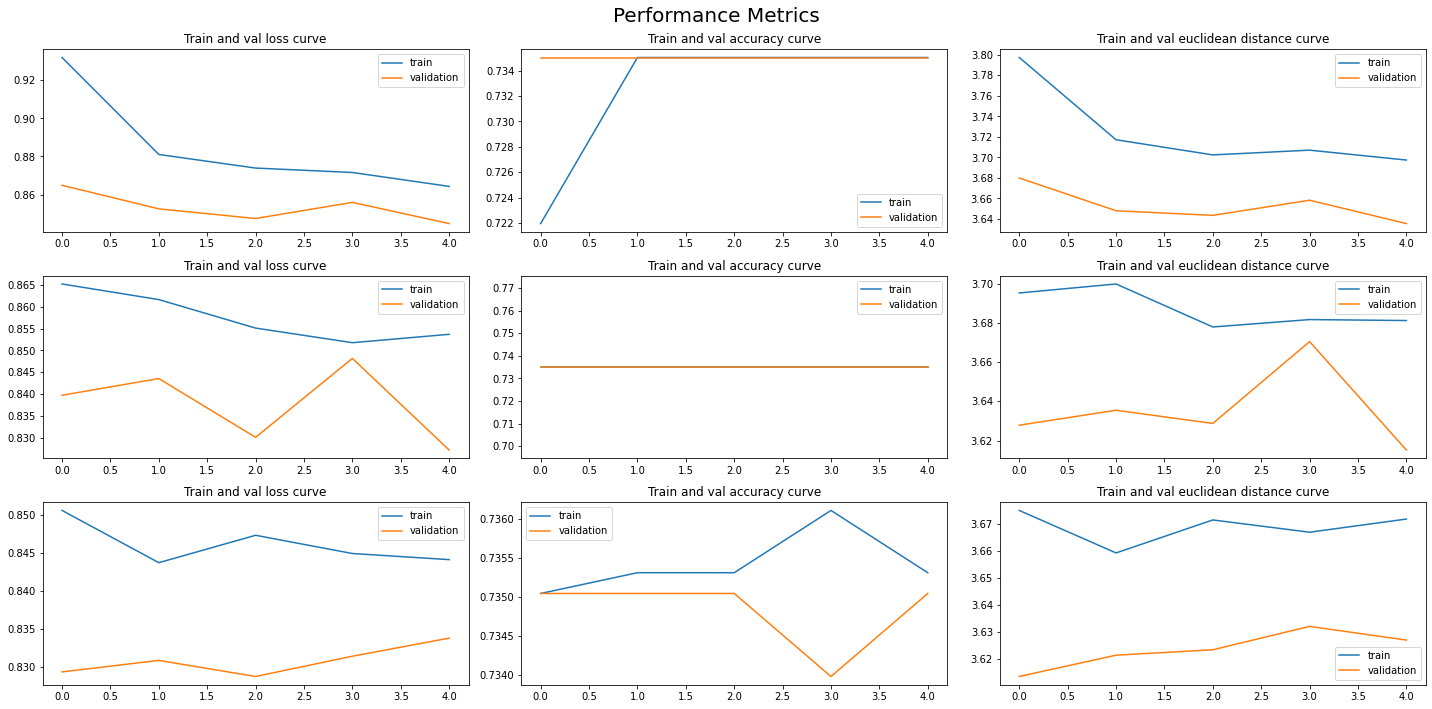

In [57]:
# Visualizing the evaluation metrics
plot_result(model_vgg_history)

## Plotting predictions on Test Dataset

In [65]:
model_names=["AlexNet", "DenseNet121", "ResNet50", "InceptionV3", "VGG16"]

In [66]:
models = [model_alexnet_result, model_denseNet_result, model_resNet_result, model_inception_result, model_vgg_result]
acc = []
sns = pd.DataFrame(index=classes, columns=model_names)
spc = pd.DataFrame(index=classes, columns=model_names)
for i in range(len(models)):
    acc.append(np.average([models[i][0], models[i][2], models[i][4]]))
    for j in range(5):
        sns[model_names[i]][classes[j]] = np.average([models[i][1]['sensitivity'][j], models[i][3]['sensitivity'][j], models[i][5]['sensitivity'][j]])
        spc[model_names[i]][classes[j]] = np.average([models[i][1]['specificity'][j], models[i][3]['specificity'][j], models[i][5]['specificity'][j]])
acc, sns, spc

([0.7301869991095279,
  0.6874443455031166,
  0.6675571386168002,
  0.6924903532205402,
  0.7301869991095279],
                AlexNet DenseNet121  ResNet50 InceptionV3 VGG16
 No_DR              1.0     0.99453   0.97619    0.983269   1.0
 Mild               1.0     0.94686  0.934092    0.955487   1.0
 Moderate           0.0    0.063806   0.09901    0.082508   0.0
 Severe             1.0    0.994179  0.991728    0.995404   1.0
 Proliferate_DR     1.0     0.99636   0.99727     0.99818   1.0,
                AlexNet DenseNet121  ResNet50 InceptionV3 VGG16
 No_DR              0.0    0.003831  0.034483    0.022989   0.0
 Mild               0.0    0.048832  0.053079    0.065817   0.0
 Moderate           1.0    0.931301       0.9    0.933333   1.0
 Severe             0.0    0.009524  0.009524         0.0   0.0
 Proliferate_DR     0.0         0.0       0.0         0.0   0.0)

In [67]:
# Specificity
spc

AlexNet DenseNet121  ResNet50 InceptionV3 VGG16
No_DR              0.0    0.003831  0.034483    0.022989   0.0
Mild               0.0    0.048832  0.053079    0.065817   0.0
Moderate           1.0    0.931301       0.9    0.933333   1.0
Severe             0.0    0.009524  0.009524         0.0   0.0
Proliferate_DR     0.0         0.0       0.0         0.0   0.0

In [68]:
# Sensitivity
sns

AlexNet DenseNet121  ResNet50 InceptionV3 VGG16
No_DR              1.0     0.99453   0.97619    0.983269   1.0
Mild               1.0     0.94686  0.934092    0.955487   1.0
Moderate           0.0    0.063806   0.09901    0.082508   0.0
Severe             1.0    0.994179  0.991728    0.995404   1.0
Proliferate_DR     1.0     0.99636   0.99727     0.99818   1.0

In [69]:
accuracy = pd.DataFrame(acc, index=model_names, columns=["accuracy"])
accuracy

accuracy
AlexNet      0.730187
DenseNet121  0.687444
ResNet50     0.667557
InceptionV3  0.692490
VGG16        0.730187

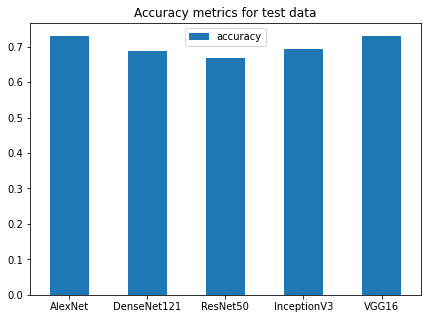

In [70]:
# Plotting the accuracy
accuracy.plot(kind='bar', figsize=(7, 5), rot=0, title="Accuracy metrics for test data");

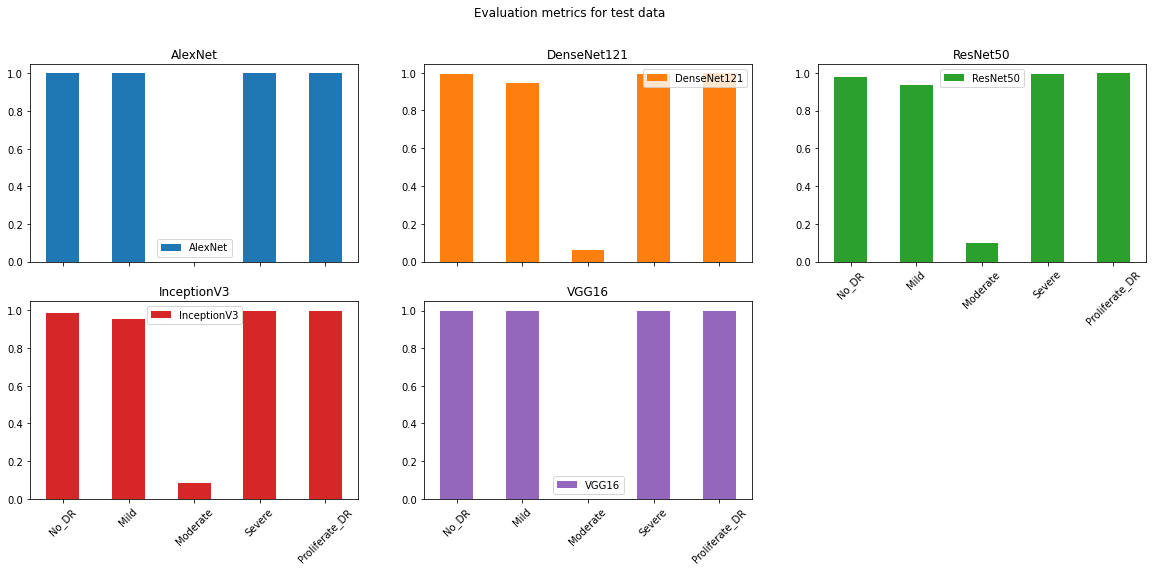

In [71]:
# Plotting the sensitivity
sns.plot(kind='bar', subplots=True, layout=(2, 3), figsize=(20, 8), rot=45, title="Evaluation metrics for test data");

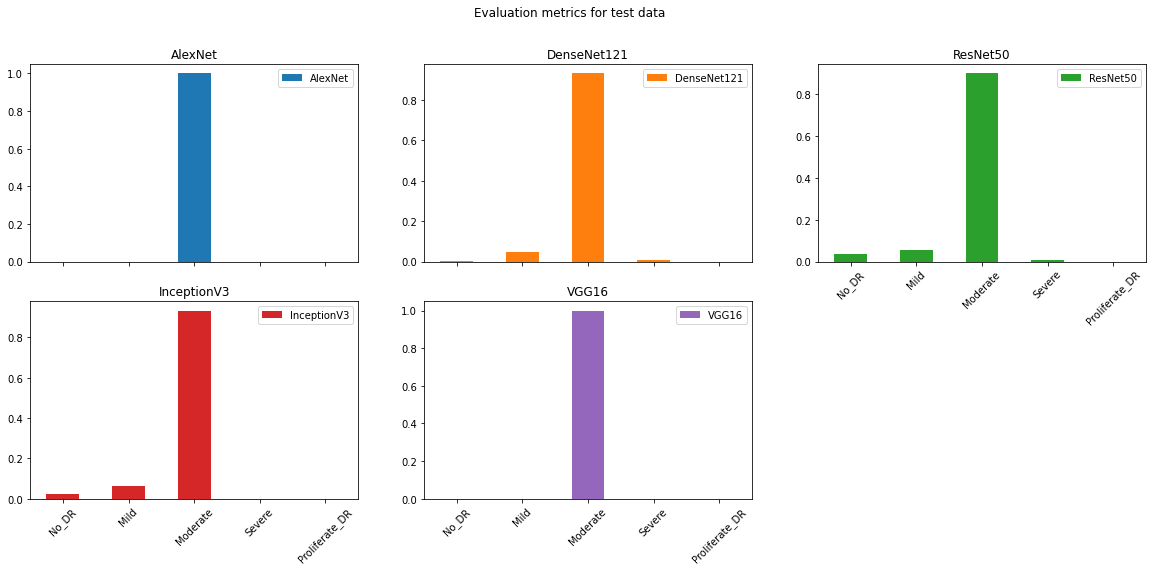

In [72]:
# Plotting the specificity
spc.plot(kind='bar', subplots=True, layout=(2, 3), figsize=(20, 8), rot=45, title="Evaluation metrics for test data");